In [214]:
import gzip
from Bio import SeqIO
from tabulate import tabulate
import matplotlib.pyplot as plt

In [215]:
k_global = 100

In [216]:
#chr_11 gives us all the isoforms of the same gene
transcripts = list(SeqIO.parse('/Users/edmund/Downloads/CS121 Final Project/chr11_transcriptome.fasta', "fasta"))
transcriptome_dict = {}
for entry in transcripts:
  transcriptome_dict[(str(entry.id))] = str(entry.seq)

In [217]:
#this creates our hash table of kmers and sorts the isoforms into each hash. i.e., the index that we produce
def generateKmers(transcriptome: dict, k: int):
    kmer_dict = {}
    for key in transcriptome: 
      for i in range(len(transcriptome[key])-k+1):
        kmer = transcriptome[key][i:i+k]
        if kmer not in kmer_dict:
          kmer_dict[kmer] = [key]
        else:
          kmer_dict[kmer].append(key)
    return kmer_dict
kmers = generateKmers(transcriptome_dict, k_global)

In [218]:
#this loads in our reads
file = gzip.open("/Users/edmund/Downloads/CS121 Final Project/reads.fasta.gz", "rt")
reads = list(SeqIO.parse(file, "fasta"))

In [219]:
#intersection function
def equivalenceClassIntersection(list1, list2):
    answer = set(list1).intersection(list2)
    return list(answer)

In [220]:
#pseudoalign one read
def pseudoalign(read, kmers: dict, k):
    equivalenceClass = []
    for i in range(len(read)-k+1):
        kmer = read[i:i+k]
        if kmer in kmers: 
            # for our first equivalence class
            if equivalenceClass == []:
                equivalenceClass = kmers[kmer] 
            else:
                equivalenceClass2 = kmers[kmer]
                equivalenceClassTemp = equivalenceClassIntersection(equivalenceClass, equivalenceClass2)
                equivalenceClass = equivalenceClassTemp
    return equivalenceClass


In [221]:
def pseudoalignment(kmers: dict, reads, k):
    equivalenceClasses = {}
    for seq in reads:
        sequence = str(seq.seq)
        #pseudoalign the read (map the read to an equivalence class)
        equivalenceClass = pseudoalign(sequence, kmers, k)
        equivalenceClassKey = ' '.join(str(s) for s in equivalenceClass)
        #if no equivalance class found, try the reverse complement
        if equivalenceClassKey == '':
            sequence = str(seq.seq.reverse_complement())
            equivalenceClass = pseudoalign(sequence, kmers, k)
            equivalenceClassKey = ' '.join(str(s) for s in equivalenceClass)
        #if still no class found, class is called "NA"
        if equivalenceClassKey == '':
            equivalenceClassKey = 'NA'
        #find the read's equivalence class and increase the count
        if equivalenceClassKey in equivalenceClasses:
            equivalenceClasses[equivalenceClassKey] += 1
        else:
            equivalenceClasses[equivalenceClassKey] = 1
    return equivalenceClasses

table = pseudoalignment(kmers, reads, k_global)

In [222]:
def isoform_count(string):
    return(len(string.strip().split(" ")))

In [223]:
#convert the dictionary to a displayable list
output = []
for key in table:
    row = []
    row.append(str(table[key]))
    if "NA" in str(key):
        row.append(0)
    else:
        row.append(isoform_count(str(key)))
    row.append(str(key))
    output.append(row)

In [224]:
output_file = open("/Users/edmund/Downloads/CS121 Final Project/output.txt","w")
output_file.write(tabulate(output, headers=["Counts", "Number of Items in Equivalence Class", "Isoforms in Equivalence Class"]))
output_file.close()

In [225]:
print(len(output))

10184


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]
[231720, 205885, 220662, 135444, 93674, 86192, 70557, 67059, 41807, 24502, 23370, 20412, 11706, 23922, 4628, 3455, 1586, 1815, 1974, 1808, 562, 2112, 516, 855, 550, 133, 1541, 263, 200, 59, 23, 22, 3, 1, 166, 184, 100, 21, 37, 241, 218, 1037, 462, 3, 99, 39, 111, 152, 399, 11, 21, 20, 127, 3, 57]


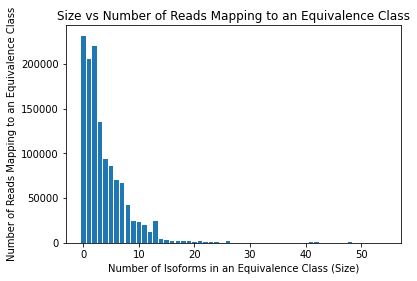

In [37]:
#make our bins, define it as the number of isoforms in an equivalence class
bins = []
for entry in output:
    bins.append(entry[1])
#this gets us our range of X's
xrange = max(bins)

x = []
#plus 1 to account for 0
for i in range(xrange+1):
    x.append(i)
print(x)

y = [0 for i in range(xrange+1)]
#for every equivalence class
for i in range(len(output)):
    y[output[i][1]] += int(output[i][0])
print(y)

plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Number of Isoforms in an Equivalence Class (Size)')
plt.ylabel('Number of Reads Mapping to an Equivalence Class')
plt.title('Size vs Number of Reads Mapping to an Equivalence Class')
plt.show()

(array([7618., 1050.,  447.,  258.,  193.,  200.,  131.,  106.,   96.,
          85.]),
 array([  0. ,  77.9, 155.8, 233.7, 311.6, 389.5, 467.4, 545.3, 623.2,
        701.1, 779. ]),
 <BarContainer object of 10 artists>)

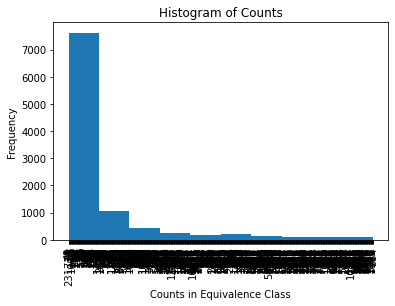

In [237]:
x = []
for i in range(len(output)):
    x.append(output[i][0])

plt.xlabel("Counts in Equivalence Class")
plt.ylabel("Frequency")
plt.title("Histogram of Counts")
plt.xticks(rotation = 90)
plt.hist(x)

(array([2.367e+03, 1.536e+03, 1.218e+03, 9.940e+02, 8.310e+02, 6.540e+02,
        5.040e+02, 3.980e+02, 3.270e+02, 2.660e+02, 2.250e+02, 1.860e+02,
        1.380e+02, 9.700e+01, 6.200e+01, 6.400e+01, 5.400e+01, 5.000e+01,
        3.600e+01, 2.600e+01, 2.300e+01, 1.300e+01, 1.000e+01, 5.000e+00,
        7.000e+00, 7.000e+00, 5.000e+00, 6.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 2.000e+00,
        2.000e+00, 5.000e+00, 5.000e+00, 6.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00]),
 array([ 0.        ,  1.01886792,  2.03773585,  3.05660377,  4.0754717 ,
         5.09433962,  6.11320755,  7.13207547,  8.1509434 ,  9.16981132,
        10.18867925, 11.20754717, 12.22641509, 13.24528302, 14.26415094,
        15.28301887, 16.30188679, 17.32075472, 18.33962264, 19.35849057,
        20.37735849, 21.39622642, 22.41509434, 23.4

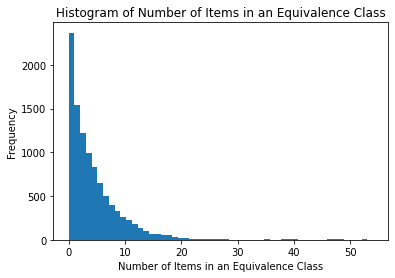

In [235]:
x = []
#plus 1 to account for 0
for i in range(len(output)):
    x.append(output[i][1])
plt.xlabel("Number of Items in an Equivalence Class")
plt.ylabel("Frequency")
plt.title("Histogram of Number of Items in an Equivalence Class")
plt.hist(x, bins = 53)